# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# 1.-

<AxesSubplot:xlabel='x', ylabel='y'>

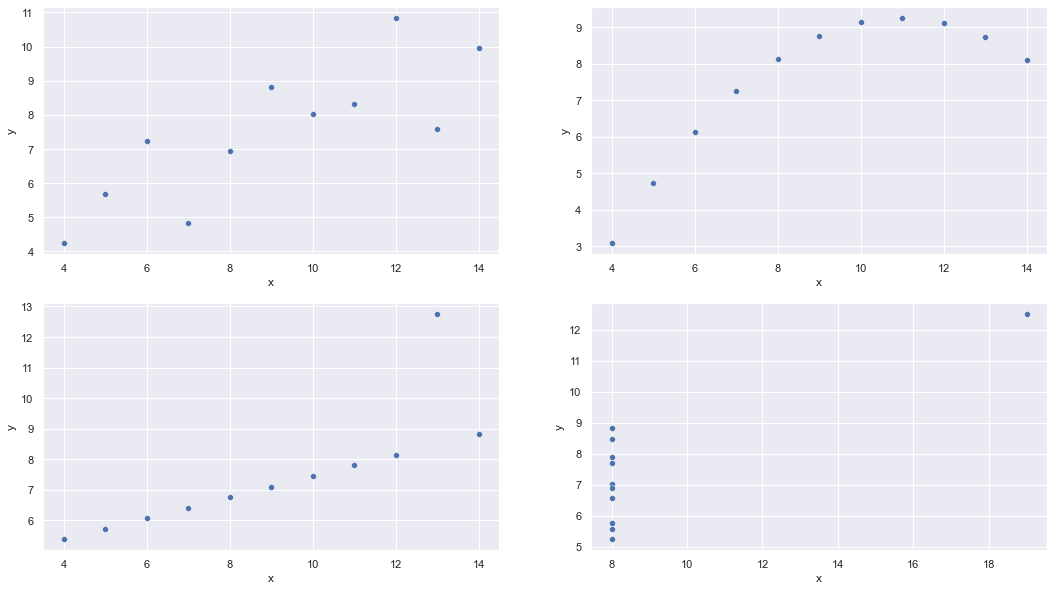

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.scatterplot(ax=axes[0, 0],data=df.loc[df['grupo']=='Grupo_1'], x="x", y="y")
sns.scatterplot(ax=axes[0, 1],data=df.loc[df['grupo']=='Grupo_2'], x="x", y="y")
sns.scatterplot(ax=axes[1, 0],data=df.loc[df['grupo']=='Grupo_3'], x="x", y="y")
sns.scatterplot(ax=axes[1, 1],data=df.loc[df['grupo']=='Grupo_4'], x="x", y="y")


podemos notar enormes diferencias entre los grupos por lo que deveria trabajarse de maneras diferentes con ellos.

# 2.-

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

podemos notar que la media, desviacion estandar del x y los conteos son iguales en todos los grupos, tambien hay mucha similitud en los percentiles y la desviacion estandar de y. es sorpresivo ver que graficos tan diferentes den valores tan similares, esto mee hace pensar que las estimaciones lineales basicas se veran muy similares.

# 3.-

In [5]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

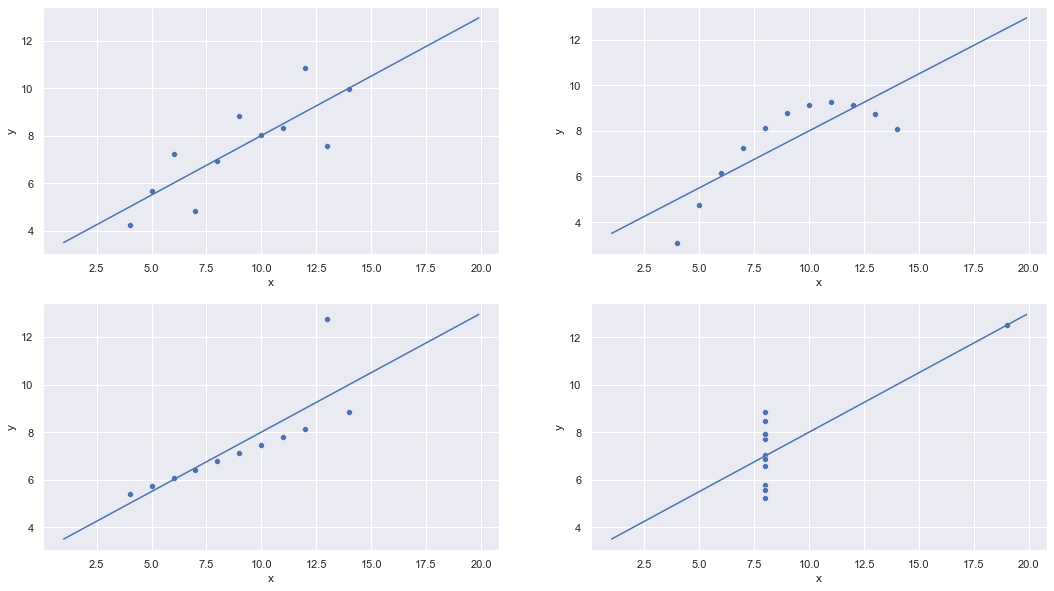

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
reg1 = LinearRegression().fit(np.array(df.loc[df['grupo']=="Grupo_1"].x).reshape(-1, 1), np.array(df.loc[df['grupo']=="Grupo_1"].y).reshape(-1, 1))
sns.scatterplot(ax=axes[0, 0],data=df.loc[df['grupo']=="Grupo_1"], x="x", y="y")
inte,coef= reg1.intercept_, reg1.coef_[0]
axes[0,0].plot(np.arange(1,20,0.1), inte+coef*np.arange(1,20,0.1))

reg2 = LinearRegression().fit(np.array(df.loc[df['grupo']=="Grupo_2"].x).reshape(-1, 1), np.array(df.loc[df['grupo']=="Grupo_2"].y).reshape(-1, 1))
sns.scatterplot(ax=axes[0, 1],data=df.loc[df['grupo']=="Grupo_2"], x="x", y="y")
inte,coef= reg2.intercept_, reg2.coef_[0]
axes[0,1].plot(np.arange(1,20,0.1), inte+coef*np.arange(1,20,0.1))

reg3 = LinearRegression().fit(np.array(df.loc[df['grupo']=="Grupo_3"].x).reshape(-1, 1), np.array(df.loc[df['grupo']=="Grupo_3"].y).reshape(-1, 1))
sns.scatterplot(ax=axes[1, 0],data=df.loc[df['grupo']=="Grupo_3"], x="x", y="y")
inte,coef= reg3.intercept_, reg3.coef_[0]
axes[1,0].plot(np.arange(1,20,0.1), inte+coef*np.arange(1,20,0.1))

reg4 = LinearRegression().fit(np.array(df.loc[df['grupo']=="Grupo_4"].x).reshape(-1, 1), np.array(df.loc[df['grupo']=="Grupo_4"].y).reshape(-1, 1))
sns.scatterplot(ax=axes[1, 1],data=df.loc[df['grupo']=="Grupo_4"], x="x", y="y")
inte,coef= reg4.intercept_, reg4.coef_[0]
axes[1,1].plot(np.arange(1,20,0.1), inte+coef*np.arange(1,20,0.1))

notamos que nuestra hipotesis fue correcta porque sin importar la diferencia visual de los graficos los datos estadistico nos adelantaron que las estimaciones lineales son muy similares entre si

# 4.- 

In [7]:
import statsmodels.api as sm
from metrics_regression import *
from sklearn.metrics import r2_score

In [8]:
df1=pd.DataFrame(
    {
        "y":df.loc[df['grupo']=="Grupo_1"].y,
        "yhat": reg1.predict(np.array(df.loc[df['grupo']=="Grupo_1"].x).reshape(-1, 1)).flatten()
        }
)
metrica1=summary_metrics(df1)
metrica1['r2'] = round (r2_score(df.loc[df['grupo']=="Grupo_1"].y,reg2.predict(np.array(df.loc[df['grupo']=="Grupo_1"].x).reshape(-1, 1)).flatten()),4)
metrica1

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.8374,1.2512,1.1185,0.1213,0.119,0.1116,0.1048,0.1167,0.6665


In [9]:
df2=pd.DataFrame(
    {
        "y":df.loc[df['grupo']=="Grupo_2"].y,
        "yhat": reg2.predict(np.array(df.loc[df['grupo']=="Grupo_2"].x).reshape(-1, 1)).flatten()
        }
)
metrica2=summary_metrics(df2)
metrica2['r2'] = round (r2_score(df.loc[df['grupo']=="Grupo_2"].y,reg2.predict(np.array(df.loc[df['grupo']=="Grupo_2"].x).reshape(-1, 1)).flatten()),4)
metrica2

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9679,1.2524,1.1191,0.157,0.1504,0.129,0.1315,0.1438,0.6662


In [10]:
df3=pd.DataFrame(
    {
        "y":df.loc[df['grupo']=="Grupo_3"].y,
        "yhat": reg3.predict(np.array(df.loc[df['grupo']=="Grupo_3"].x).reshape(-1, 1)).flatten()
        }
)
metrica3=summary_metrics(df3)
metrica3['r2'] = round (r2_score(df.loc[df['grupo']=="Grupo_3"].y,reg3.predict(np.array(df.loc[df['grupo']=="Grupo_3"].x).reshape(-1, 1)).flatten()),4)
metrica3

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.716,1.2506,1.1183,0.0797,0.0791,0.0955,0.0712,0.0814,0.6663


In [11]:
df4=pd.DataFrame(
    {
        "y":df.loc[df['grupo']=="Grupo_4"].y,
        "yhat": reg4.predict(np.array(df.loc[df['grupo']=="Grupo_4"].x).reshape(-1, 1)).flatten()
        }
)
metric4 = summary_metrics(df4)
metric4['r2'] = round (r2_score(df.loc[df['grupo']=="Grupo_4"].y,reg2.predict(np.array(df.loc[df['grupo']=="Grupo_4"].x).reshape(-1, 1)).flatten()),4)
metric4

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9027,1.2493,1.1177,0.1347,0.1324,0.1203,0.1167,0.1303,0.6667


todos los modelos  tienen un coeficiente de determinacion muy similar pero no muy alto por lo que el modelo regresion lineal solo no es una buena prediccion en ninguno de los grupos. Otro indicio  de que el modelo no es el mejor es  notar que algunas metricas tienen  valores mayores a 1 en todos los grupos. habra que buscar mejores formas de modelar la estimacion.

# 5.-

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

el ajuste para el primer modelo no sabria mejorarlo porque los datos estan muy dispersos y no veo una relacion evidente, se podria hacer un modelo mas robusto pero no seria muy preciso ignorar mas datos en una base de datos tan pequeña

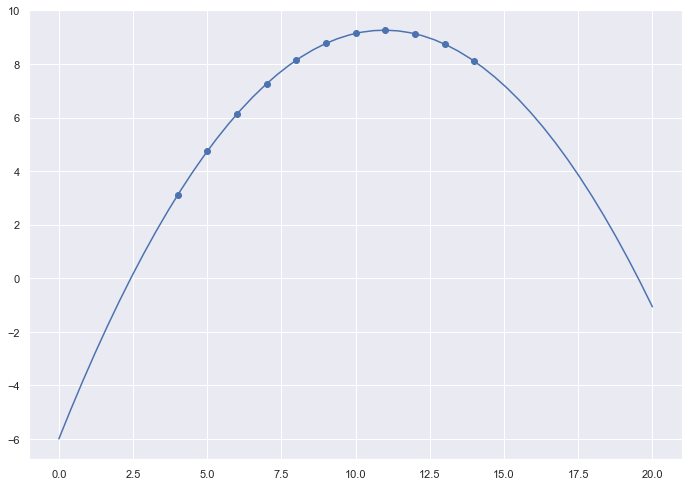

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0012,0.0,0.0014,0.0002,0.0002,0.0002,0.0001,0.0002,1.0


In [13]:
reg = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(np.array(df.loc[df["grupo"]=="Grupo_2"].x).reshape(-1, 1),np.array(df.loc[df["grupo"]=="Grupo_2"].y).reshape(-1, 1))
plt.figure()
plt.scatter(np.array(df.loc[df["grupo"]=="Grupo_2"].x).reshape(-1, 1),np.array(df.loc[df["grupo"]=="Grupo_2"].y).reshape(-1, 1))
X_seq = np.linspace(0,20).reshape(-1,1)
plt.plot(X_seq,reg.predict(X_seq))
plt.show()

df4=pd.DataFrame(
    {
        "y":df.loc[df['grupo']=="Grupo_2"].y,
        "yhat": reg.predict(np.array(df.loc[df['grupo']=="Grupo_2"].x).reshape(-1, 1)).flatten()
        }
)
metric4 = summary_metrics(df4)
metric4['r2'] = round (r2_score(df.loc[df['grupo']=="Grupo_2"].y,reg.predict(np.array(df.loc[df['grupo']=="Grupo_2"].x).reshape(-1, 1)).flatten()),4)
metric4

con este grafico intui que una estimacion polinomial seria mas apropiadas y podemosnotar que es correcto ya que las metras son muy bajas, la estimacion grafica muy bien los puntos y r2 es igual a 1. muy ideal

In [14]:
df_3=df.loc[df['grupo']=="Grupo_3"]
df_3 = df_3[df_3.y < 10]
df_3

,x,y,grupo
22,10,7.46,Grupo_3
23,8,6.77,Grupo_3
25,9,7.11,Grupo_3
26,11,7.81,Grupo_3
27,14,8.84,Grupo_3
28,6,6.08,Grupo_3
29,4,5.39,Grupo_3
30,12,8.15,Grupo_3
31,7,6.42,Grupo_3
32,5,5.73,Grupo_3


In [15]:
reg6 = LinearRegression().fit(np.array(df_3.x).reshape(-1, 1), np.array(df_3.y).reshape(-1, 1))
df6=pd.DataFrame(
    {
        "y":df_3.y,
        "yhat": reg6.predict(np.array(df_3.x).reshape(-1, 1)).flatten()
        }
)
metrica3=summary_metrics(df6)
metrica3['r2'] = round (r2_score(df_3.y,reg6.predict(np.array(df_3.x).reshape(-1, 1)).flatten()),4)
metrica3

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0023,0.0,0.0028,0.0003,0.0003,0.0003,0.0003,0.0003,1.0


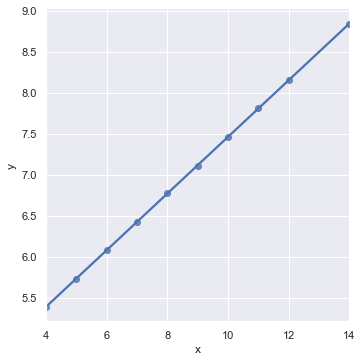

In [16]:
sns.lmplot(x="x", y="y",data=df_3)

en estos datos vimos un punto outliner pero el resto de los datos se notan bastante lineal por lo que eliminamos ese valor y notamos que nuestro modelo pasa a ser muy preciso, con r2 igual a 1, metricas bajas y una grafica muy precisa.

In [17]:
reg6 = LinearRegression().fit(np.array(df_3.y).reshape(-1, 1), np.array(df_3.x).reshape(-1, 1))
df6=pd.DataFrame(
    {
        "y":df_3.x,
        "yhat": reg6.predict(np.array(df_3.y).reshape(-1, 1)).flatten()
        }
)
metrica3=summary_metrics(df6)
metrica3['r2'] = round (r2_score(df_3.x,reg6.predict(np.array(df_3.y).reshape(-1, 1)).flatten()),4)
metrica3

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0067,0.0001,0.008,0.0009,0.0009,0.0008,0.0008,0.0009,1.0


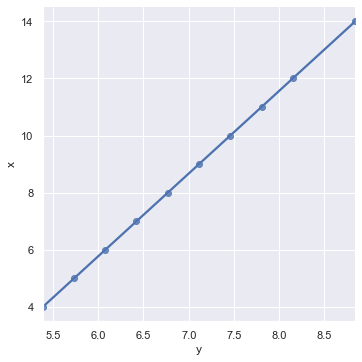

In [18]:
sns.lmplot(x="y", y="x",data=df_3)

para este modelo cambiamos los valores de x por los de y, ya que se concentraban muchos valores iguales en x y en y aumentaban pregresivamente. este modelo tiene r2 igual a 1 y se nota que es muy preciso para estimar estos datos